# Linear regression

## 1. Uni-variate linear regression

### 1.1. Least square estimate
One of the basic models to try, while learning dependence between two real-valued variables $X$ and $Y$ is a uni-variate linear regression:
$$
y=w x.
$$

Admitting that the model's accuracy is not be absolute: 
$$
y=w x + \varepsilon,\hspace{5ex} (1.1)
$$
where $\varepsilon$ is the model's error (often called noise or residual).

The objective is to learn $w$ given a training set of $\{(x_i, y_i), i=1..N\}$ providing the best possible fit for the model. The fit could be characterized by the errors of the model
$$
\varepsilon_i=y_i-w x_i
$$
and in particular by their sum of squares:
$$
RSS(w)=\sum\limits_i \varepsilon_i^2=\sum\limits_i (y_i-w x_i)^2. \hspace{5ex} (1.2)
$$
Minimizing such $RSS(w)\to min$ is called a least square approach. With respect to this criteria, regression becomes an optimization problem
$$
\hat{w}=argmin_w RSS(w). \hspace{5ex} (1.3)
$$
Luckily this problem has a precise analytic solution following from RSS function's shape and local extremum criteria:
$$
RSS'(w)=0,
$$
i.e.
$$
0=\frac{d\sum\limits_i (y_i-w x_i)^2}{dw}=\sum\limits_i\frac{d (y_i-w x_i)^2}{dw}=\sum\limits_i -2 x_i(y_i-w x_i),
$$$$
0=\sum\limits_i x_i y_i- w \sum\limits_i (x_i)^2,
$$$$
\sum\limits_i x_i y_i = w \sum\limits_i (x_i)^2,
$$$$
w=\frac{\sum\limits_i x_i y_i}{\sum\limits_i (x_i)^2}. \hspace{5ex} (1.4)
$$
Thinking of $x_i$ and $y_i$ as the observations of random variables $X$ and $Y$ this can be rewritten as
$$
w=\frac{E[XY]}{E[X^2]}.
$$

### 1.2. Case of normalized variables 
In case variables $x,y$ were normalized as
$$
x:=\frac{x-E[X]}{\sigma[X]},\ y:=\frac{y-E[Y]}{\sigma[Y]}
$$
in order to ensure zero averages $E[X]=E[Y]=0$ and unit standard deviations $\sigma[X]=\sigma[Y]=1$, the equation for $w$ could be rewritten as
$$
w=\frac{E[XY]-E[X]E[Y]}{E[X^2]-E[X]^2}=\frac{E[XY]-E[X]E[Y]}{\sigma[X]^2}=\frac{E[XY]-E[X]E[Y]}{\sigma[X]\sigma[Y]}=corr(X,Y).
$$
So in case of normalized $x,y$ a best fit univariate linear regression is provided by an equation
$$
y=corr(X,Y)x
$$



## 2. Multiple linear regression

### 2.1. Definition and parameter estimation

As we remember linear model between single real-value regressor $x$ and output variable $y$ is expressed by 
$$
y=w_1 x + w_0 +\varepsilon.
$$
$w_1$-slope coefficient, $w_0$ - intercept, $\varepsilon$ - random noise. In a more general case when $x$ is a real-valued $n \times 1$-vector $x=(x_1,x_2,...,x_n)^T$, the model could be easily generalized as
$$
y=\sum\limits_j w_j x_j +\varepsilon (2.1)
$$
or in a vector form
$$
y=w^T x+\varepsilon, \hspace{5ex} (2.1')
$$
where $w=(w_1,w_2,...,w_n)$ is also a $n \times 1$-vector. 
Notice that intercept is not specifically separated as it could be always introduced by adding a dummy variable $x^m\equiv 1$.

The probabilistic view on the model in the assumption that $\varepsilon\sim {\cal N}(0,\sigma^2)$ is
$$
p(y|x,w,\sigma)={\cal N}(y|w^T x,\sigma^2).
$$

Given a training set $X=\{(x_j^i), j=1..n, i=1..N\}$, $Y=\{(y^i), i=1..N\}$ (further also denote columns of $X$ as $X_j=\{(x_j^i), i=1..N\}$), the least square optimization criteria for inferring a vector of coefficients $w$ can be written as

$$
RSS(w)= \sum \limits_i \varepsilon_i^2= \sum \limits_i (y^i-w^T x^i)^2. \hspace{5ex} (2.2)
$$

or in a matrix form:
$$
RSS(w)=(Y-X w)^T(Y-X w).
$$
Then finding an estimate
$$
\hat{w}=argmin_w RSS(w)
$$
can be done by solving the system (in a matrix form)
$$
0=\frac{\partial RSS(\hat{w})}{\partial w}=2X^T (Y-X \hat{w}).
$$
Using matrix formalism the solution could be expressed as
$$
\hat{w}=\left(X^T X\right )^{-1}X^T Y. \hspace{5ex} (2.3)
$$
This assumes that $X^T X$ is non-singular. Otherwise we have a case of multicollinearity.

### 2.2. Case of orthogonal/uncorrelated regressors

Typically the resulting estimates for the coefficients $w_j$ of a multi-variate regression (2.1) are not the same as one could get from performing a series of uni-variate regressions 
$$
y\sim w_j x_j, j=1,2,...,n. \hspace{5ex} (2.4)
$$
This is because the regressors might be correlated with each other and their impacts on the output variable could overlap and partly offset one another.

But in one special case of mutually orthogonal regressors, such that 
$$
x_i^T x_j=0, \hspace{5ex} (2.5)
$$ 
for each $i\neq j$, multi-variate regression can be derived through a series of uni-variate regressions. This is because such a condition makes the matrix $X^T X$ in (2.3) diagonal and the solution effectively splits into a series of solutions (1.4) for the regressions (2.4). Condition (2.5) is called orthogonality of regressors. 

In a particular case, when all the regressors are normalized as in 1.2, the orthogonality condition (2.5) is equivalent to the regressors being mutually uncorrelated. Then for normalized mutually uncorrelated regressors and a normalized output variable, a multi-variate regression (2.1) can be estimated as
$$
y\sim\sum\limits_j corr(X_j,Y) x_j, \hspace{5ex} (2.6)
$$
i.e. all the coefficients are estimated as correlations between the columns of observations for each regressor and the output variable. But remember, this is only the case when the regressors and the output variable were normalized and the regressors appeared to be mutually uncorrelated. Correlated regressors which we deal with in most cases do not allow using the formulae (2.6).

### 2.3. Regression performance: R-squared

In the same way as for the bi-variate regression:
$$
R^2=1-\frac{RSS}{\sum\limits_i (y_i-\overline{y})^2}=\frac{\sum\limits_i (\hat{y}_i-\overline{y})^2}{\sum\limits_i (y_i-\overline{y})^2},
$$
where $\overline{y}=\sum\limits_i y_i$ is the sample mean of observed values of responce variable, while $\hat{y}_i=w^T x_i$ is the predicted value of output variable as compared to the observed value of $y_i$ corresponding to $x=x_i$. This way $R^2$ is often interpreted as a fraction of responce variable's variance explained by linear model. $R^2=1$ is equivalent to $RSS=0$, i.e. the model fits the observations exactly, i.e. responce variable depends linearly on the explaining variables. On the other hand, $R^2=0$ means that the model always predicts the sample mean $\overline{y}$, i.e. explaining variables $x$ have no effect on responce variable $y$. 

Least-square criteria is equivalent to maximizing $R^2$.

In case of a bi-variate regression with intercept $R^2=corr(Y,X)^2$, i.e. is a square of a correlation coefficient between observations of input and output variables.

## Case 1. Real estate prices in NYC

### Consider rolling sales data as in the LAB 2
##### The Department of Finance’s Rolling Sales files lists properties that sold in the last twelve-month period in New York City for all tax classes. These files include:
* sale date
* the address, zip code and tax borough, block and lot (BBL)
* building type;
* square footage;
* the price
* other characteristics

Focus on the Staten Island in 2019 and ask a question: 
### **which characteristic of the house would be the best predictor for its price?**
And implement such prediction using linear regression.

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pylab as plt
import math
import os 
import seaborn as sns #for styling the plots
import warnings
import urllib.request
%matplotlib inline

In [2]:
#load the house sales data from staten island
REStaten=pd.read_excel('2019statenisland.xlsx',skiprows=4)

In [3]:
#fix column names, excluding \n
REStaten.columns = [col.replace('\n','').replace(' ','_') for col in REStaten.columns]
REStaten.head(5)

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AS_OF_FINAL_ROLL_18/19,BLOCK,LOT,EASE-MENT,BUILDING_CLASS_AS_OF_FINAL_ROLL_18/19,ADDRESS,APARTMENT_NUMBER,...,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE
0,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5391,13,NaN,A5,4716 AMBOY ROAD,NaN,...,1.0,0.0,1.0,1871.0,910.0,2002.0,1,A5,0,2019-07-10
1,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5393,29,NaN,A1,21 FINGAL STREET,NaN,...,1.0,0.0,1.0,9000.0,3540.0,1985.0,1,A1,1650000,2019-03-14
2,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5395,23,NaN,A1,525 SYCAMORE STREET,NaN,...,1.0,0.0,1.0,10000.0,2848.0,1980.0,1,A1,775000,2019-12-13
3,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5398,20,NaN,A1,1468 ARDEN AVENUE,NaN,...,1.0,0.0,1.0,5000.0,2200.0,1940.0,1,A1,685000,2019-04-15
4,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5399,15,NaN,A2,2 SANDBORN STREET,NaN,...,1.0,0.0,1.0,4845.0,880.0,1950.0,1,A2,0,2019-01-24


In [4]:
#subset dataframe by selecting columns we're going to use
selectedNames = ['BOROUGH','BLOCK','LOT', 'BUILDING_CLASS_CATEGORY', 'ADDRESS', 'ZIP_CODE',
                'GROSS_SQUARE_FEET', 'YEAR_BUILT','SALE_PRICE', 'SALE_DATE','RESIDENTIAL_UNITS','COMMERCIAL_UNITS','LAND_SQUARE_FEET']
REStaten = REStaten[selectedNames]
REStaten.head()

,BOROUGH,BLOCK,LOT,BUILDING_CLASS_CATEGORY,ADDRESS,ZIP_CODE,GROSS_SQUARE_FEET,YEAR_BUILT,SALE_PRICE,SALE_DATE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,LAND_SQUARE_FEET
0,5,5391,13,01 ONE FAMILY DWELLINGS,4716 AMBOY ROAD,10312.0,910.0,2002.0,0,2019-07-10,1.0,0.0,1871.0
1,5,5393,29,01 ONE FAMILY DWELLINGS,21 FINGAL STREET,10312.0,3540.0,1985.0,1650000,2019-03-14,1.0,0.0,9000.0
2,5,5395,23,01 ONE FAMILY DWELLINGS,525 SYCAMORE STREET,10312.0,2848.0,1980.0,775000,2019-12-13,1.0,0.0,10000.0
3,5,5398,20,01 ONE FAMILY DWELLINGS,1468 ARDEN AVENUE,10312.0,2200.0,1940.0,685000,2019-04-15,1.0,0.0,5000.0
4,5,5399,15,01 ONE FAMILY DWELLINGS,2 SANDBORN STREET,10312.0,880.0,1950.0,0,2019-01-24,1.0,0.0,4845.0


In [5]:
#get some statistics; does not make sense for categorical columns, like zip code, lot etc, but gives an idea of distributions for house characteristics  
REStaten.describe()

,BOROUGH,BLOCK,LOT,ZIP_CODE,GROSS_SQUARE_FEET,YEAR_BUILT,SALE_PRICE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,LAND_SQUARE_FEET
count,8371.0,8371.000000,8371.000000,8365.000000,8280.000000,7856.000000,8.371000e+03,8280.000000,8280.000000,8.280000e+03
mean,5.0,3383.670649,183.094612,10307.971907,1605.700725,1968.794297,4.157112e+05,1.194807,0.044928,4.812098e+03
std,0.0,2378.865466,414.758348,4.149530,2416.613354,31.534770,1.291787e+06,0.743192,0.304432,3.112026e+04
min,5.0,1.000000,1.000000,10301.000000,0.000000,1800.000000,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,5.0,1092.000000,24.000000,10305.000000,1020.000000,1950.000000,0.000000e+00,1.000000,0.000000,2.191500e+03
50%,5.0,3246.000000,55.000000,10308.000000,1440.000000,1975.000000,3.950000e+05,1.000000,0.000000,3.420000e+03
75%,5.0,5458.000000,125.000000,10312.000000,2025.000000,1991.000000,5.990000e+05,1.000000,0.000000,4.810000e+03
max,5.0,8050.000000,5344.000000,10314.000000,108275.000000,2019.000000,9.272502e+07,19.000000,8.000000,2.549173e+06


In [6]:
#unique categories of buildings
REStaten['BUILDING_CLASS_CATEGORY'].unique()

array(['01 ONE FAMILY DWELLINGS', '02 TWO FAMILY DWELLINGS',
       '05 TAX CLASS 1 VACANT LAND', '21 OFFICE BUILDINGS',
       '22 STORE BUILDINGS', '29 COMMERCIAL GARAGES',
       '31 COMMERCIAL VACANT LAND', '04 TAX CLASS 1 CONDOS',
       '06 TAX CLASS 1 - OTHER', '14 RENTALS - 4-10 UNIT',
       '33 EDUCATIONAL FACILITIES', '10 COOPS - ELEVATOR APARTMENTS',
       '13 CONDOS - ELEVATOR APARTMENTS', '43 CONDO OFFICE BUILDINGS',
       '30 WAREHOUSES', '07 RENTALS - WALKUP APARTMENTS',
       '32 HOSPITAL AND HEALTH FACILITIES', '03 THREE FAMILY DWELLINGS',
       '09 COOPS - WALKUP APARTMENTS', '12 CONDOS - WALKUP APARTMENTS',
       '37 RELIGIOUS FACILITIES', '27 FACTORIES',
       '41 TAX CLASS 4 - OTHER', '44 CONDO PARKING',
       '15 CONDOS - 2-10 UNIT RESIDENTIAL',
       '16 CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT',
       '35 INDOOR PUBLIC AND CULTURAL FACILITIES',
       '08 RENTALS - ELEVATOR APARTMENTS',
       '36 OUTDOOR RECREATIONAL FACILITIES'], dtype=object)

In [7]:
#sanity filtering (and take only those with residential units)
REStaten = REStaten.loc[(REStaten['ZIP_CODE'] > 0) & (REStaten['GROSS_SQUARE_FEET'] > 0) & (REStaten['YEAR_BUILT'] > 0) & (REStaten['SALE_PRICE'] > 0)]
REStaten = REStaten.loc[(REStaten['YEAR_BUILT'] >= 1850) & (REStaten['GROSS_SQUARE_FEET'] >=300) & (REStaten['GROSS_SQUARE_FEET'] <1e4) & (REStaten['LAND_SQUARE_FEET'] >=300)
              & (REStaten['SALE_PRICE'] >= 1e4) & (REStaten['SALE_PRICE'] <= 3e6) & (REStaten['RESIDENTIAL_UNITS']>0)]

In [8]:
#take only one-three family houses
REStaten_ = REStaten[REStaten['BUILDING_CLASS_CATEGORY'].apply(lambda x: x[:2]).astype('int')<=3].copy()

In [9]:
REStaten_['BUILDING_CLASS_CATEGORY'].unique()

array(['01 ONE FAMILY DWELLINGS', '02 TWO FAMILY DWELLINGS',
       '03 THREE FAMILY DWELLINGS'], dtype=object)

In [10]:
REStaten_.shape

(4416, 13)

In [11]:
REStaten_.describe()

,BOROUGH,BLOCK,LOT,ZIP_CODE,GROSS_SQUARE_FEET,YEAR_BUILT,SALE_PRICE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,LAND_SQUARE_FEET
count,4416.0,4416.000000,4416.000000,4416.000000,4416.000000,4416.000000,4.416000e+03,4416.000000,4416.000000,4416.000000
mean,5.0,3379.954031,81.978261,10307.974411,1709.162364,1968.017889,5.826647e+05,1.281476,0.005208,3932.816803
std,0.0,2385.493555,95.660983,4.096904,753.904671,32.913716,2.337312e+05,0.471888,0.075069,2787.484429
min,5.0,14.000000,1.000000,10301.000000,400.000000,1865.000000,1.000000e+04,1.000000,0.000000,353.000000
25%,5.0,1084.000000,23.000000,10305.000000,1216.750000,1945.000000,4.440990e+05,1.000000,0.000000,2400.000000
50%,5.0,3287.500000,50.000000,10308.000000,1516.000000,1970.000000,5.550000e+05,1.000000,0.000000,3500.000000
75%,5.0,5487.000000,103.000000,10312.000000,2050.000000,1995.000000,6.850000e+05,2.000000,0.000000,4600.000000
max,5.0,8050.000000,853.000000,10314.000000,9375.000000,2019.000000,2.575000e+06,4.000000,2.000000,45444.000000


Get a better idea of the data by looking at the distribution (histograms) of the key characteristics

array([[<Axes: title={'center': 'RESIDENTIAL_UNITS'}>]], dtype=object)

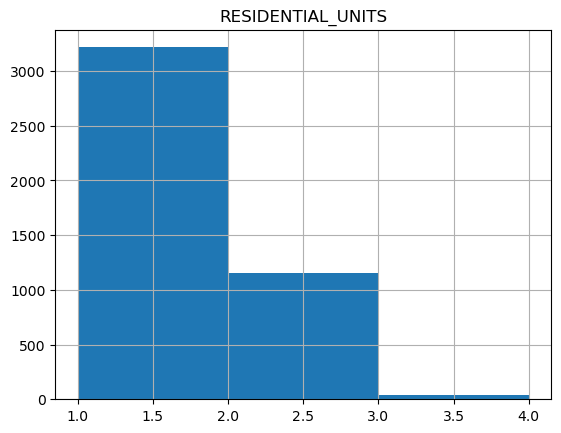

In [12]:
#stats on the number of residential units
REStaten_.hist('RESIDENTIAL_UNITS',bins=3)

Now look at the correlation between all the quantitative parameters of the properties

### Correlation analysis

In [13]:
REStaten_[['YEAR_BUILT','RESIDENTIAL_UNITS','COMMERCIAL_UNITS','GROSS_SQUARE_FEET','LAND_SQUARE_FEET','SALE_PRICE']].corr()

,YEAR_BUILT,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,GROSS_SQUARE_FEET,LAND_SQUARE_FEET,SALE_PRICE
YEAR_BUILT,1.000000,-0.009658,-0.054582,0.141006,-0.220481,0.206584
RESIDENTIAL_UNITS,-0.009658,1.000000,-0.009424,0.383982,0.110894,0.245418
COMMERCIAL_UNITS,-0.054582,-0.009424,1.000000,0.067633,0.067733,0.005392
GROSS_SQUARE_FEET,0.141006,0.383982,0.067633,1.000000,0.464357,0.640454
LAND_SQUARE_FEET,-0.220481,0.110894,0.067733,0.464357,1.000000,0.521999
SALE_PRICE,0.206584,0.245418,0.005392,0.640454,0.521999,1.000000


Size, land area appear to demonstrate the strongest correlations trailed by the number of residential units

Perform a uni-variate linear regression on the feature showing the strongest correlation - the size

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
#fit the regression without intercept
lm = LinearRegression(fit_intercept=False).fit(REStaten_[['GROSS_SQUARE_FEET']], REStaten_['SALE_PRICE'])

In [16]:
#slope coefficient
lm.coef_

array([317.72592299])

In [17]:
#fit regression with intercept
lm = LinearRegression(fit_intercept=True).fit(REStaten_[['GROSS_SQUARE_FEET']], REStaten_['SALE_PRICE'])
lm.coef_, lm.intercept_

(array([198.55835005]), 243296.25750452257)

In [18]:
print('Price~{}*Size+{}'.format(lm.coef_[0],lm.intercept_))

Price~198.5583500451369*Size+243296.25750452257


In [19]:
#alternative implementation with formulae
lm = smf.ols(formula='SALE_PRICE~GROSS_SQUARE_FEET', data = REStaten_).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:             SALE_PRICE   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     3070.
Date:                Sat, 11 Nov 2023   Prob (F-statistic):               0.00
Time:                        00:22:28   Log-Likelihood:                -59690.
No. Observations:                4416   AIC:                         1.194e+05
Df Residuals:                    4414   BIC:                         1.194e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          2.433e+05   6694.58

Now standardize the sale_price and gross_square_feet by subtracting averages and dividing by standard deviation
$$
X^*:=(X-E[X])/\sigma(X)
$$
Repeat the regression. Compare the regression coefficient against the correlation between sale_price and gross_square_feet. Do you find smth interesting here? Does the slope coefficient remind you something?

In [20]:
REStaten_['PRICE_stand']=(REStaten_['SALE_PRICE']-REStaten_['SALE_PRICE'].mean())/REStaten_['SALE_PRICE'].std()

In [21]:
REStaten_['SIZE_stand']=(REStaten_['GROSS_SQUARE_FEET']-REStaten_['GROSS_SQUARE_FEET'].mean())/REStaten_['GROSS_SQUARE_FEET'].std()

In [22]:
#alternative implementation with formulae (-1 stands for no intercept as it inclused one by default)
lm = smf.ols(formula='PRICE_stand~SIZE_stand-1', data = REStaten_).fit()
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:            PRICE_stand   R-squared (uncentered):                   0.410
Model:                            OLS   Adj. R-squared (uncentered):              0.410
Method:                 Least Squares   F-statistic:                              3070.
Date:                Sat, 11 Nov 2023   Prob (F-statistic):                        0.00
Time:                        00:22:28   Log-Likelihood:                         -5099.8
No. Observations:                4416   AIC:                                  1.020e+04
Df Residuals:                    4415   BIC:                                  1.021e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [23]:
#as we see the coefficient is exactly the correlation coefficient between the Price and Size
corrXY = np.corrcoef(REStaten_['SALE_PRICE'],REStaten_['GROSS_SQUARE_FEET'])[0,1]; corrXY

0.6404539846221196

In [24]:
#and the R-squared is exactly the square of the correlation coefficient
corrXY**2

0.41018130641835016

In [25]:
lm.rsquared

0.41018130641835027

In [26]:
#reconstruct original scale regression using the standardized regression
muX = REStaten_['GROSS_SQUARE_FEET'].mean(); muX

1709.1623641304348

In [27]:
sigmaX = REStaten_['GROSS_SQUARE_FEET'].std(); sigmaX

753.9046706673964

In [28]:
muY = REStaten_['SALE_PRICE'].mean(); muY

582664.7164855072

In [29]:
sigmaY = REStaten_['SALE_PRICE'].std(); sigmaY

233731.18302537053

In [30]:
w1 = sigmaY * corrXY / sigmaX; w1

198.5583500451368

In [31]:
w0 = muY - sigmaY * corrXY * muX / sigmaX; w0

243296.2575045228

In [32]:
#now compare with the original non-standardised regression
lm = smf.ols(formula='SALE_PRICE~GROSS_SQUARE_FEET', data = REStaten_).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:             SALE_PRICE   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     3070.
Date:                Sat, 11 Nov 2023   Prob (F-statistic):               0.00
Time:                        00:22:28   Log-Likelihood:                -59690.
No. Observations:                4416   AIC:                         1.194e+05
Df Residuals:                    4414   BIC:                         1.194e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          2.433e+05   6694.58

In [33]:
#also consider a regression without intercept
lm = smf.ols(formula='SALE_PRICE~GROSS_SQUARE_FEET-1', data = REStaten_).fit()
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:             SALE_PRICE   R-squared (uncentered):                   0.894
Model:                            OLS   Adj. R-squared (uncentered):              0.894
Method:                 Least Squares   F-statistic:                          3.716e+04
Date:                Sat, 11 Nov 2023   Prob (F-statistic):                        0.00
Time:                        00:22:28   Log-Likelihood:                         -60268.
No. Observations:                4416   AIC:                                  1.205e+05
Df Residuals:                    4415   BIC:                                  1.205e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

The summary does not only return the coefficient estimate but also a lot of statistics including standard error and confidence interval for it (the interval to which the coefficient value is supposed to belong with 95\% confidence. Where do those come from as the formulae (2.3) seem perfectly robust?
Any model comes with an uncertainty of both - the fit and the coefficients estimate. Illustrate it in the experiment below.

In [34]:
#perform regression on 100 subsamples
np.random.seed(2019)
W=[]
for i in range(0,100):
    df=REStaten_.sample(frac=0.7)
    lm = smf.ols(formula='SALE_PRICE~GROSS_SQUARE_FEET-1', data = df).fit()
    W+=[lm.params.GROSS_SQUARE_FEET]

In [35]:
#and report mean and standard deviations of the resulting slope coefficients
np.array(W).mean()

317.64825558819604

In [36]:
np.array(W).std()

1.8040727106985592

but mind the fact that variance will actually depend on the sample sizes and there is no direct correspondence - it was coincidental that the std of our experiments matched standard error reported in the regression summary. Those are different concepts. This experiment is just an illustration of the idea. A more robust explanation of the confidence intervals of the fit will be provided later in the class

Visualizations might further give an idea on how does the regression perform

C:\Users\14367\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='GROSS_SQUARE_FEET', ylabel='SALE_PRICE'>

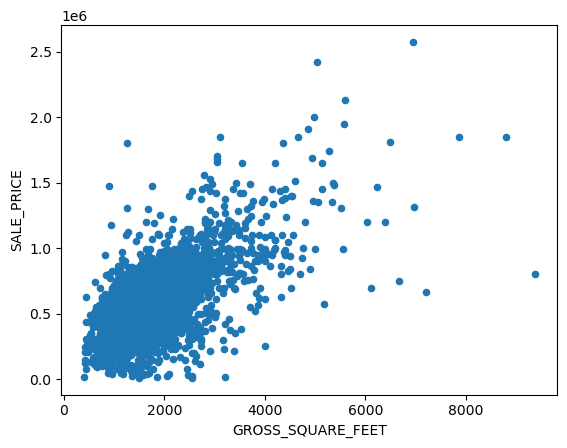

In [37]:
#first visualize the data
REStaten_.plot(x='GROSS_SQUARE_FEET',y='SALE_PRICE',kind='scatter')

In [38]:
#obtain values predicted by the regression
lm = smf.ols(formula='SALE_PRICE~GROSS_SQUARE_FEET', data = REStaten_).fit()
REStaten_['predicted_price']=lm.predict()

In [39]:
REStaten_[['SALE_PRICE','predicted_price']].head()

,SALE_PRICE,predicted_price
1,1650000,946192.816664
2,775000,808790.438433
3,685000,680124.627604
6,620000,393406.370139
8,1221900,799259.637631


C:\Users\14367\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


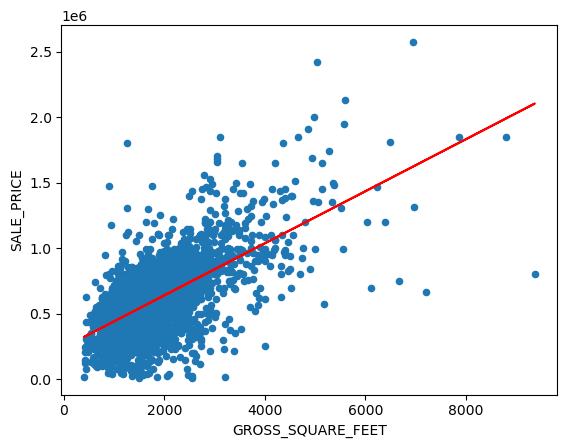

In [40]:
#add the prediction line
fig, ax = plt.subplots() #get axis to plot on
REStaten_.plot(ax=ax,kind='scatter',x='GROSS_SQUARE_FEET', y='SALE_PRICE') #show the data
ax.plot(REStaten_['GROSS_SQUARE_FEET'],REStaten_['predicted_price'],'r-'); #show the regression line

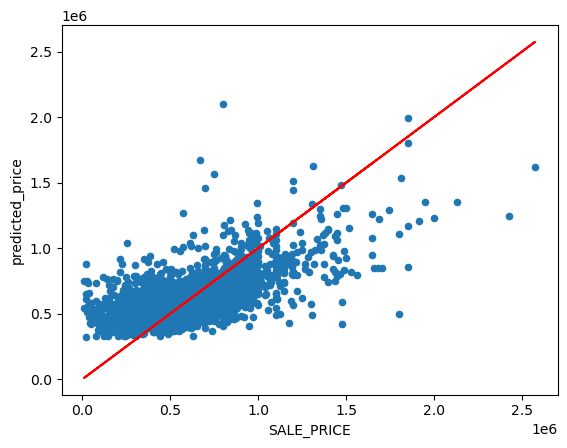

In [41]:
#another way visualize: actual values vs predicted values
fig, ax = plt.subplots() #get axis to plot on
REStaten_.plot(ax=ax,kind='scatter',x='SALE_PRICE', y='predicted_price') #show the data
ax.plot(REStaten_['SALE_PRICE'],REStaten_['SALE_PRICE'],'r-'); #show the regression line

### Homework task 1. Perform regressions on the remaining regressors: 
LAND_SQUARE_FEET,YEAR_BUILT,RESIDENTIAL_UNITS,COMMERCIAL_UNITS, with intercept. Visualize the regression fit

Report results (together with those for GROSS_SQ_FEET) in a data frame with the following columns: 
slope | intercept | R2, having regressors as index. R-squared could be obtained through lm.rsquared

In [42]:
REStaten_

,BOROUGH,BLOCK,LOT,BUILDING_CLASS_CATEGORY,ADDRESS,ZIP_CODE,GROSS_SQUARE_FEET,YEAR_BUILT,SALE_PRICE,SALE_DATE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,LAND_SQUARE_FEET,PRICE_stand,SIZE_stand,predicted_price
1,5,5393,29,01 ONE FAMILY DWELLINGS,21 FINGAL STREET,10312.0,3540.0,1985.0,1650000,2019-03-14,1.0,0.0,9000.0,4.566508,2.428474,946192.816664
2,5,5395,23,01 ONE FAMILY DWELLINGS,525 SYCAMORE STREET,10312.0,2848.0,1980.0,775000,2019-12-13,1.0,0.0,10000.0,0.822891,1.510586,808790.438433
3,5,5398,20,01 ONE FAMILY DWELLINGS,1468 ARDEN AVENUE,10312.0,2200.0,1940.0,685000,2019-04-15,1.0,0.0,5000.0,0.437833,0.651061,680124.627604
6,5,5405,5,01 ONE FAMILY DWELLINGS,108 LENZIE STREET,10312.0,756.0,1920.0,620000,2019-02-14,1.0,0.0,5000.0,0.159736,-1.264301,393406.370139
8,5,5407,39,01 ONE FAMILY DWELLINGS,193 BATHGATE STREET,10312.0,2800.0,2018.0,1221900,2019-05-09,2.0,0.0,5000.0,2.734917,1.446917,799259.637631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8360,5,7349,35,02 TWO FAMILY DWELLINGS,33 QUAIL LANE,10309.0,2377.0,1998.0,640000,2019-03-08,2.0,0.0,2255.0,0.245304,0.885838,715269.455562
8361,5,7351,22,02 TWO FAMILY DWELLINGS,22 HERRICK AVENUE,10309.0,2400.0,2000.0,917000,2019-03-01,2.0,0.0,4000.0,1.430427,0.916346,719836.297613
8363,5,7355,68,02 TWO FAMILY DWELLINGS,62 AMBASSADOR LA,10309.0,2160.0,2001.0,610000,2019-08-06,2.0,0.0,2340.0,0.116952,0.598004,672182.293602
8364,5,7355,85,02 TWO FAMILY DWELLINGS,104 AMBASSADOR LANE,10309.0,2565.0,2001.0,625000,2019-07-30,2.0,0.0,2730.0,0.181128,1.135207,752598.425370


In [43]:
lsf = LinearRegression(fit_intercept=True).fit(REStaten_[['LAND_SQUARE_FEET']],REStaten_['SALE_PRICE'])
lsf.coef_, lsf.intercept_

(array([43.76971034]), 410526.46420976304)

In [44]:
lsf = smf.ols(formula='SALE_PRICE~LAND_SQUARE_FEET', data = REStaten_).fit()
REStaten_['predicted_price_lsf']=lsf.predict()

In [45]:
lsf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             SALE_PRICE   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     1653.
Date:                Sat, 11 Nov 2023   Prob (F-statistic):          2.82e-307
Time:                        00:22:30   Log-Likelihood:                -60153.
No. Observations:                4416   AIC:                         1.203e+05
Df Residuals:                    4414   BIC:                         1.203e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         4.105e+05   5189.009     79.115      0.000       4e+05    4.21e+05
LAND_SQUARE_FEET    43.7697      1.076     40.660      0.000      41.659      45.880
==============================================================================
Omnibus:                      564.059   Durbin-Watson:                   1.390
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3286.905
Skew:                           0.462   Prob(JB):                         0.00
Kurtosis:                       7.124   Cond. No.                     8.34e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.34e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\14367\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


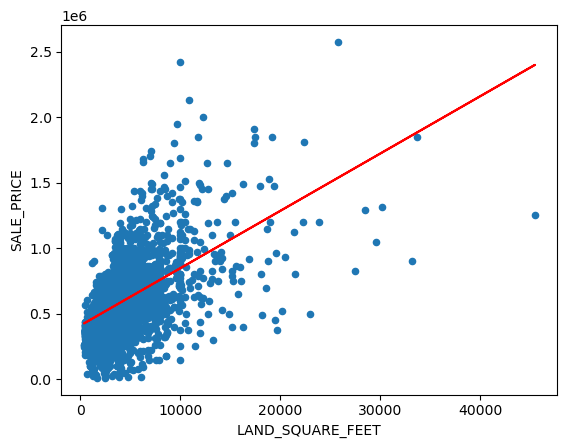

In [46]:
fig, ax = plt.subplots()
REStaten_.plot(ax=ax,kind='scatter',x='LAND_SQUARE_FEET', y='SALE_PRICE')
ax.plot(REStaten_['LAND_SQUARE_FEET'],REStaten_['predicted_price_lsf'],'r-')

In [47]:
yb = LinearRegression(fit_intercept=True).fit(REStaten_[['YEAR_BUILT']],REStaten_['SALE_PRICE'])
yb.coef_, yb.intercept_

(array([1467.01784858]), -2304452.653733136)

In [48]:
yb = smf.ols(formula='SALE_PRICE~YEAR_BUILT', data = REStaten_).fit()
REStaten_['predicted_price_yb']=yb.predict()

In [49]:
yb.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             SALE_PRICE   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     196.8
Date:                Sat, 11 Nov 2023   Prob (F-statistic):           9.09e-44
Time:                        00:22:30   Log-Likelihood:                -60760.
No. Observations:                4416   AIC:                         1.215e+05
Df Residuals:                    4414   BIC:                         1.215e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.304e+06   2.06e+05    -11.195      0.000   -2.71e+06    -1.9e+06
YEAR_BUILT  1467.0178    104.581     14.028      0.000    1261.987    1672.049
==============================================================================
Omnibus:                     1461.842   Durbin-Watson:                   1.118
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8521.067
Skew:                           1.457   Prob(JB):                         0.00
Kurtosis:                       9.150   Cond. No.                     1.18e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.18e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\14367\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


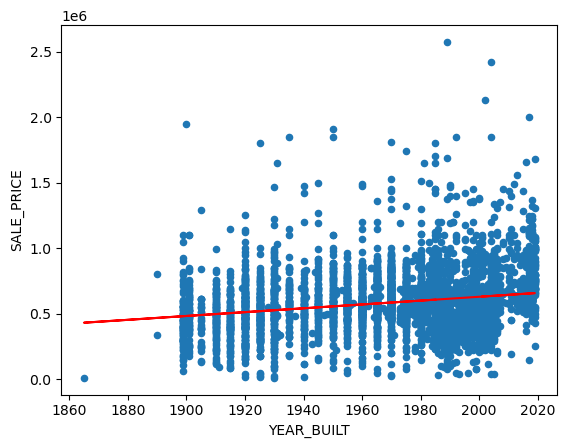

In [50]:
fig, ax = plt.subplots()
REStaten_.plot(ax=ax,kind='scatter',x='YEAR_BUILT', y='SALE_PRICE')
ax.plot(REStaten_['YEAR_BUILT'],REStaten_['predicted_price_yb'],'r-')

In [51]:
ru = LinearRegression(fit_intercept=True).fit(REStaten_[['RESIDENTIAL_UNITS']],REStaten_['SALE_PRICE'])
ru.coef_, ru.intercept_

(array([121558.32466401]), 426890.5862152041)

In [52]:
ru = smf.ols(formula='SALE_PRICE~RESIDENTIAL_UNITS', data = REStaten_).fit()
REStaten_['predicted_price_ru']=ru.predict()

In [53]:
ru.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             SALE_PRICE   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     282.9
Date:                Sat, 11 Nov 2023   Prob (F-statistic):           1.40e-61
Time:                        00:22:31   Log-Likelihood:                -60719.
No. Observations:                4416   AIC:                         1.214e+05
Df Residuals:                    4414   BIC:                         1.215e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          4.269e+05   9869.373     43.254      0.000    4.08e+05    4.46e+05
RESIDENTIAL_UNITS  1.216e+05   7227.237     16.819      0.000    1.07e+05    1.36e+05
==============================================================================
Omnibus:                     1590.126   Durbin-Watson:                   1.170
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11766.592
Skew:                           1.523   Prob(JB):                         0.00
Kurtosis:                      10.394   Cond. No.                         5.90
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\14367\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


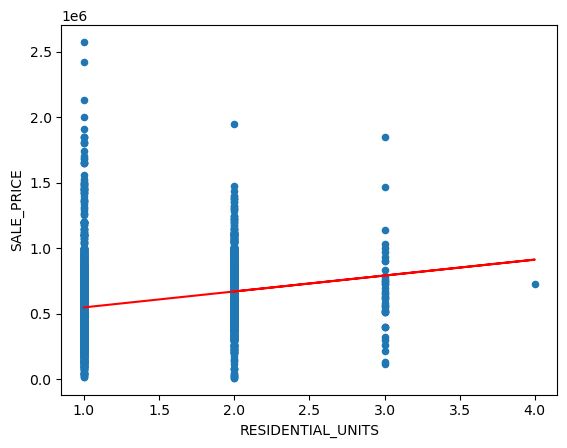

In [54]:
fig, ax = plt.subplots()
REStaten_.plot(ax=ax,kind='scatter',x='RESIDENTIAL_UNITS', y='SALE_PRICE')
ax.plot(REStaten_['RESIDENTIAL_UNITS'],REStaten_['predicted_price_ru'],'r-')

In [55]:
cu = LinearRegression(fit_intercept=True).fit(REStaten_[['COMMERCIAL_UNITS']], REStaten_['SALE_PRICE'])
cu.coef_, cu.intercept_

(array([16788.90768265]), 582577.2742579934)

In [56]:
cu = smf.ols(formula='SALE_PRICE~COMMERCIAL_UNITS', data = REStaten_).fit()
REStaten_['predicted_price_cu']=cu.predict()

In [57]:
cu.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             SALE_PRICE   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.1283
Date:                Sat, 11 Nov 2023   Prob (F-statistic):              0.720
Time:                        00:22:31   Log-Likelihood:                -60856.
No. Observations:                4416   AIC:                         1.217e+05
Df Residuals:                    4414   BIC:                         1.217e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         5.826e+05   3526.046    165.221      0.000    5.76e+05    5.89e+05
COMMERCIAL_UNITS  1.679e+04   4.69e+04      0.358      0.720   -7.51e+04    1.09e+05
==============================================================================
Omnibus:                     1448.543   Durbin-Watson:                   1.113
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8112.566
Skew:                           1.456   Prob(JB):                         0.00
Kurtosis:                       8.968   Cond. No.                         13.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\14367\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


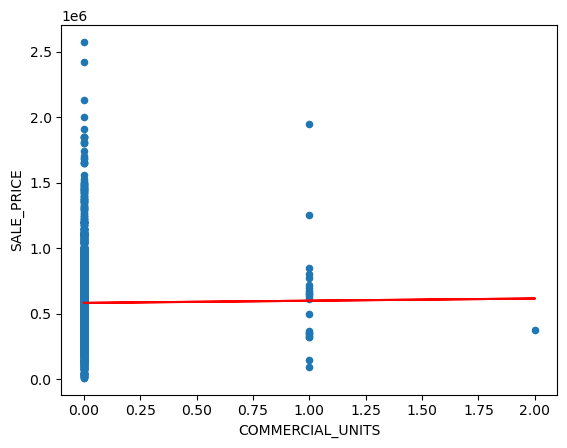

In [58]:
fig, ax = plt.subplots()
REStaten_.plot(ax=ax, kind='scatter', x='COMMERCIAL_UNITS', y='SALE_PRICE')
ax.plot(REStaten_['COMMERCIAL_UNITS'],REStaten_['predicted_price_cu'],'r-')

In [59]:
df = pd.DataFrame(columns=['coef','intercept','R2'])

In [60]:
lm.params

Intercept            243296.257505
GROSS_SQUARE_FEET       198.558350
dtype: float64

In [61]:
Index=['lm','lsf','yb','ru','cu']
i=0
for name in [lm,lsf,yb,ru,cu]:
    LM = name
    R2 = LM.rsquared
    p = LM.params
    data = {
        'coef':p[1],
        'intercept':p[0],
        'R2':R2
    }
    i+=1
    df.loc[Index[i-1]]=data

In [62]:
df

,coef,intercept,R2
lm,198.558350,2.432963e+05,0.410181
lsf,43.769710,4.105265e+05,0.272483
yb,1467.017849,-2.304453e+06,0.042677
ru,121558.324664,4.268906e+05,0.060230
cu,16788.907683,5.825773e+05,0.000029


## Multi-variate regression case

Now try multivariate regression on GROSS_SQUARE_FEET+LAND_SQUARE_FEET+YEAR_BUILT together

In [63]:
lm = smf.ols(formula='SALE_PRICE~GROSS_SQUARE_FEET+LAND_SQUARE_FEET+YEAR_BUILT', data = REStaten_).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:             SALE_PRICE   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     1589.
Date:                Sat, 11 Nov 2023   Prob (F-statistic):               0.00
Time:                        00:22:32   Log-Likelihood:                -59238.
No. Observations:                4416   AIC:                         1.185e+05
Df Residuals:                    4412   BIC:                         1.185e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2.933e+06   1.55e+0

In [64]:
#notice that the coefficient for the gross_square_feet have changed again - likely due to the correlation with land size

Now try multivariate regression on RESIDENTIAL_UNITS+COMMERCIAL_UNITS together

In [65]:
lm = smf.ols(formula='SALE_PRICE~RESIDENTIAL_UNITS+COMMERCIAL_UNITS', data = REStaten_).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:             SALE_PRICE   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     141.6
Date:                Sat, 11 Nov 2023   Prob (F-statistic):           2.58e-60
Time:                        00:22:32   Log-Likelihood:                -60719.
No. Observations:                4416   AIC:                         1.214e+05
Df Residuals:                    4413   BIC:                         1.215e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          4.267e+05   9875.49

And now combine all the variables together

In [66]:
lm = smf.ols(formula='SALE_PRICE~GROSS_SQUARE_FEET+LAND_SQUARE_FEET+YEAR_BUILT+RESIDENTIAL_UNITS+COMMERCIAL_UNITS', data = REStaten_).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:             SALE_PRICE   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     964.6
Date:                Sat, 11 Nov 2023   Prob (F-statistic):               0.00
Time:                        00:22:32   Log-Likelihood:                -59224.
No. Observations:                4416   AIC:                         1.185e+05
Df Residuals:                    4410   BIC:                         1.185e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2.987e+06   1.57e+0

Again, the coefficients have changed, but now, surprisingly, the impact of commercial units seems to be negative!

This is because they are strongly correlated with house size and for the houses of the same size, slicing them into the larger number of smaller units does not seem to increase the price anymore. However we should be careful with interpretations when the regressors are correlated 

## Homework task 2

Now consider houses with different numbers of residential units: repeat the SALE_PRICE~GROSS_SQUARE_FEET+LAND_SQUARE_FEET+YEAR_BUILT regression for houses with  RESIDENTIAL_UNITS==1,2 and "3 or above", COMMERCIAL_UNITS==0. Summarize the number of samples in each category, coefficients and r-squared values of the corresponding regressions in a dataframe with the following columns: samples,GROSS_SQUARE_FEET_coef,LAND_SQUARE_FEET_coef,YEAR_BUILT,coef,Intercept,R2. Make the number of RESIDENTIAL_UNITS (1,2 or '3+') an index

In [67]:
REStaten_1=REStaten_[(REStaten_['RESIDENTIAL_UNITS']==1)&(REStaten_['COMMERCIAL_UNITS']==0)]

In [68]:
lm1 = smf.ols(formula='SALE_PRICE~GROSS_SQUARE_FEET+LAND_SQUARE_FEET+YEAR_BUILT', data = REStaten_1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:             SALE_PRICE   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     1186.
Date:                Sat, 11 Nov 2023   Prob (F-statistic):               0.00
Time:                        00:22:32   Log-Likelihood:                -42733.
No. Observations:                3200   AIC:                         8.547e+04
Df Residuals:                    3196   BIC:                         8.550e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2.012e+06   1.88e+0

In [69]:
REStaten_2=REStaten_[(REStaten_['RESIDENTIAL_UNITS']==2)&(REStaten_['COMMERCIAL_UNITS']==0)]

In [70]:
lm2 = smf.ols(formula='SALE_PRICE~GROSS_SQUARE_FEET+LAND_SQUARE_FEET+YEAR_BUILT', data = REStaten_2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:             SALE_PRICE   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     293.1
Date:                Sat, 11 Nov 2023   Prob (F-statistic):          3.28e-141
Time:                        00:22:32   Log-Likelihood:                -15516.
No. Observations:                1151   AIC:                         3.104e+04
Df Residuals:                    1147   BIC:                         3.106e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -4.663e+06   2.84e+0

In [71]:
REStaten_3oa=REStaten_[(REStaten_['RESIDENTIAL_UNITS']>=3)&(REStaten_['COMMERCIAL_UNITS']==0)]

In [72]:
lm3oa = smf.ols(formula='SALE_PRICE~GROSS_SQUARE_FEET+LAND_SQUARE_FEET+YEAR_BUILT', data = REStaten_3oa).fit()
print(lm3oa.summary())

                            OLS Regression Results                            
Dep. Variable:             SALE_PRICE   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     14.64
Date:                Sat, 11 Nov 2023   Prob (F-statistic):           1.55e-06
Time:                        00:22:32   Log-Likelihood:                -590.13
No. Observations:                  43   AIC:                             1188.
Df Residuals:                      39   BIC:                             1195.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -4.258e+06   2.03e+0

In [73]:
multi_df = pd.DataFrame(columns=['samples','GROSS_SQUARE_FEET_coef','LAND_SQUARE_FEET_coef','YEAR_BUILT_coef','Intercept','R2'])

In [74]:
lm1.params[0]

-2012217.5501064772

In [75]:
Index=['1','2','3+']
i=0
for name in [lm1,lm2,lm3oa]:
    LM = name
    nos = LM.nobs
    R2 = LM.rsquared
    p = LM.params
    data = {
        'samples':nos,
        'GROSS_SQUARE_FEET_coef':p[1],
        'LAND_SQUARE_FEET_coef':p[2],
        'YEAR_BUILT_coef':p[3],
        'Intercept':p[0],
        'R2':R2
    }
    i+=1
    multi_df.loc[Index[i-1]]=data

In [76]:
multi_df

,samples,GROSS_SQUARE_FEET_coef,LAND_SQUARE_FEET_coef,YEAR_BUILT_coef,Intercept,R2
1,3200.0,139.387163,30.558815,1134.016234,-2.012218e+06,0.526892
2,1151.0,113.883675,31.076155,2517.044042,-4.662861e+06,0.433946
3+,43.0,29.529114,51.992945,2381.431181,-4.258056e+06,0.529637


## Urban activity data

Many of your Urban Informatics projects will deal with urban populations. Let's take a closer look on how it can be defined and how it is distributed in space. 

Specifically lets focus on the following question:

### Is the residential population distribution representative for urban dynamics in bulk? 
### Can adding daytime population help?

Daytime population is based on LEHD commute data: https://lehd.ces.census.gov/data/

The activity dataset includes Citibike trips, 311 service requests, Mobile device connections, subway entries, taxi trips, Twitter activity aggregated on the level of taxi zones. More details on those data can be found in the preprint [Zhu, E., Khan, M., Kats, P., Bamne, S. S., & Sobolevsky, S. (2018). Digital urban sensing: A multi-layered approach. arXiv preprint arXiv:1809.01280] completed together with CUSP students.


In [77]:
#Upload the main dataset
SMdata=pd.read_csv("Socio-mobility.csv",index_col=0)

In [78]:
#rename some of the columns for the sake of consistency and also to replace '-'
SMdata.rename(columns={'mobile-device_spatial':'mobile','citibike_spatial':'citibike','sr311_spatial':'sr311','subway_spatial':'subway','taxi_spatial':'taxi','twitter_spatial':'twitter'},inplace=True)

In [79]:
#also upload two other datasets from the last class - residential and working population
LEHDW=pd.read_csv("LEHD-work.csv",index_col=0)

In [80]:
#notice that residential population here (from LEHD, based on the workforce residences) 
#is different from the one in the main dataset 
LEHDR=pd.read_csv("LEHD-resident.csv",index_col=0)

In [81]:
#merge the dataframes (inner merge on index - taxi zone number); take only the columns to use later
SMdata=SMdata[['population','mobile','citibike','sr311','subway','taxi','twitter']].merge(LEHDW[['total']].rename(columns={'total':'working'}), on=None, left_index=True, right_index=True, how='inner')

In [82]:
SMdata=SMdata.merge(LEHDR[['total']].rename(columns={'total':'residential'}), on=None, left_index=True, right_index=True, how='inner')

In [83]:
#glimpse into the final data
SMdata.head()

,population,mobile,citibike,sr311,subway,taxi,twitter,working,residential
tz,,,,,,,,,
3,32450.0,109300,0,700,225527.5,31960,480,4989,11398
4,27571.0,179644,31545,399,0.0,178515,85,2717,12318
5,26482.0,56271,0,490,0.0,3667,40,1191,10751
6,15896.0,147674,0,255,0.0,7456,88,2495,6729
7,77252.0,508255,0,1389,3336898.0,362180,2294,17223,43048


In [84]:
#get pair-wise column correlations
SMdata.corr()

,population,mobile,citibike,sr311,subway,taxi,twitter,working,residential
population,1.000000,0.670248,-0.210465,0.877397,-0.042691,-0.059860,-0.028276,-0.099852,0.969425
mobile,0.670248,1.000000,-0.066319,0.607098,0.219016,0.144768,0.214191,0.175743,0.646672
citibike,-0.210465,-0.066319,1.000000,-0.183276,0.486907,0.748109,0.372861,0.513090,-0.102762
sr311,0.877397,0.607098,-0.183276,1.000000,-0.010677,-0.026607,0.066799,-0.049597,0.865145
subway,-0.042691,0.219016,0.486907,-0.010677,1.000000,0.630203,0.496341,0.703456,0.020381
taxi,-0.059860,0.144768,0.748109,-0.026607,0.630203,1.000000,0.556061,0.720043,0.053496
twitter,-0.028276,0.214191,0.372861,0.066799,0.496341,0.556061,1.000000,0.626458,0.017787
working,-0.099852,0.175743,0.513090,-0.049597,0.703456,0.720043,0.626458,1.000000,-0.040786
residential,0.969425,0.646672,-0.102762,0.865145,0.020381,0.053496,0.017787,-0.040786,1.000000


But notice that some activities are not defined for the entire city. Would be more appropriate to correlate only where activity is defined

In [85]:
#auxiliary function to compute correlations between columns where both have data
def NZPopCorr(col1,col2):
    ind=(SMdata[col1]>0)&(SMdata[col2]>0)
    return np.corrcoef(SMdata[col1][ind],SMdata[col2][ind])[0][1]

In [86]:
#output a table with correlations between activities and population counts
PL=['population','residential','working']
ML=['taxi','subway','citibike','twitter','mobile','sr311']
pd.DataFrame([[NZPopCorr(M,P) for P in PL] for M in ML],columns=PL,index=ML) 

,population,residential,working
taxi,-0.064720,0.049633,0.719559
subway,-0.232504,-0.141712,0.720643
citibike,-0.126996,0.011210,0.319030
twitter,-0.032551,0.017787,0.626458
mobile,0.676604,0.646672,0.175743
sr311,0.869460,0.863358,-0.056116


Now we can implement a regression for urban activities a) vs population and b) vs LEHD residential and working population taken as separate regressors

Implement these regressions a) and b) for taxi and 311. No intercept

In [87]:
lm = smf.ols(formula='taxi~working+residential-1', data = SMdata.loc[SMdata.taxi>0]).fit()
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                   taxi   R-squared (uncentered):                   0.688
Model:                            OLS   Adj. R-squared (uncentered):              0.685
Method:                 Least Squares   F-statistic:                              279.9
Date:                Sat, 11 Nov 2023   Prob (F-statistic):                    6.01e-65
Time:                        00:22:32   Log-Likelihood:                         -3426.8
No. Observations:                 256   AIC:                                      6858.
Df Residuals:                     254   BIC:                                      6865.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [88]:
lm = smf.ols(formula='sr311~working+residential-1', data = SMdata.loc[SMdata.sr311>0]).fit()
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                  sr311   R-squared (uncentered):                   0.901
Model:                            OLS   Adj. R-squared (uncentered):              0.901
Method:                 Least Squares   F-statistic:                              1156.
Date:                Sat, 11 Nov 2023   Prob (F-statistic):                   5.67e-128
Time:                        00:22:32   Log-Likelihood:                         -1807.3
No. Observations:                 255   AIC:                                      3619.
Df Residuals:                     253   BIC:                                      3626.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

### Homework task 3: 
Implement within a loop regressions of each activity vs residential and working population, no intercept. Make sure to include in each regression for each activity type only those areas with nonzero activity counts for this type. Report the regression coefficients along with R2's in a table. Create a bar plots of R2's of the regressions

In [89]:
ML

['taxi', 'subway', 'citibike', 'twitter', 'mobile', 'sr311']

In [90]:
lm_taxi = smf.ols(formula='taxi~working+residential-1', data = SMdata.loc[SMdata.taxi>0]).fit()
print(lm_taxi.summary())

                                 OLS Regression Results                                
Dep. Variable:                   taxi   R-squared (uncentered):                   0.688
Model:                            OLS   Adj. R-squared (uncentered):              0.685
Method:                 Least Squares   F-statistic:                              279.9
Date:                Sat, 11 Nov 2023   Prob (F-statistic):                    6.01e-65
Time:                        00:22:32   Log-Likelihood:                         -3426.8
No. Observations:                 256   AIC:                                      6858.
Df Residuals:                     254   BIC:                                      6865.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [91]:
lm_subway = smf.ols(formula='subway~working+residential-1', data = SMdata.loc[SMdata.subway>0]).fit()
print(lm_subway.summary())

                                 OLS Regression Results                                
Dep. Variable:                 subway   R-squared (uncentered):                   0.659
Model:                            OLS   Adj. R-squared (uncentered):              0.655
Method:                 Least Squares   F-statistic:                              149.1
Date:                Sat, 11 Nov 2023   Prob (F-statistic):                    9.51e-37
Time:                        00:22:32   Log-Likelihood:                         -2564.0
No. Observations:                 156   AIC:                                      5132.
Df Residuals:                     154   BIC:                                      5138.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [92]:
lm_citibike = smf.ols(formula='citibike~working+residential-1', data = SMdata.loc[SMdata.citibike>0]).fit()
print(lm_citibike.summary())

                                 OLS Regression Results                                
Dep. Variable:               citibike   R-squared (uncentered):                   0.577
Model:                            OLS   Adj. R-squared (uncentered):              0.566
Method:                 Least Squares   F-statistic:                              54.48
Date:                Sat, 11 Nov 2023   Prob (F-statistic):                    1.17e-15
Time:                        00:22:32   Log-Likelihood:                         -975.11
No. Observations:                  82   AIC:                                      1954.
Df Residuals:                      80   BIC:                                      1959.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [93]:
lm_twitter = smf.ols(formula='twitter~working+residential-1', data = SMdata.loc[SMdata.twitter>0]).fit()
print(lm_twitter.summary())

                                 OLS Regression Results                                
Dep. Variable:                twitter   R-squared (uncentered):                   0.525
Model:                            OLS   Adj. R-squared (uncentered):              0.522
Method:                 Least Squares   F-statistic:                              141.2
Date:                Sat, 11 Nov 2023   Prob (F-statistic):                    5.27e-42
Time:                        00:22:32   Log-Likelihood:                         -2159.5
No. Observations:                 257   AIC:                                      4323.
Df Residuals:                     255   BIC:                                      4330.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [94]:
lm_mobile = smf.ols(formula='mobile~working+residential-1', data = SMdata.loc[SMdata.mobile>0]).fit()
print(lm_mobile.summary())

                                 OLS Regression Results                                
Dep. Variable:                 mobile   R-squared (uncentered):                   0.788
Model:                            OLS   Adj. R-squared (uncentered):              0.786
Method:                 Least Squares   F-statistic:                              474.4
Date:                Sat, 11 Nov 2023   Prob (F-statistic):                    1.17e-86
Time:                        00:22:32   Log-Likelihood:                         -3481.5
No. Observations:                 257   AIC:                                      6967.
Df Residuals:                     255   BIC:                                      6974.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [95]:
lm_sr311 = smf.ols(formula='sr311~working+residential-1', data = SMdata.loc[SMdata.sr311>0]).fit()
print(lm_sr311.summary())

                                 OLS Regression Results                                
Dep. Variable:                  sr311   R-squared (uncentered):                   0.901
Model:                            OLS   Adj. R-squared (uncentered):              0.901
Method:                 Least Squares   F-statistic:                              1156.
Date:                Sat, 11 Nov 2023   Prob (F-statistic):                   5.67e-128
Time:                        00:22:32   Log-Likelihood:                         -1807.3
No. Observations:                 255   AIC:                                      3619.
Df Residuals:                     253   BIC:                                      3626.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [96]:
table = pd.DataFrame(columns=['activity_type','working_coef','residential_coef','R2'])

In [97]:
Index=['taxi', 'subway', 'citibike', 'twitter', 'mobile', 'sr311']
i=0
for name in [lm_taxi, lm_subway, lm_citibike, lm_twitter, lm_mobile, lm_sr311]:
    LM = name
    R2 = LM.rsquared
    p = LM.params
    data = {
        'activity_type':Index[i],
        'working_coef':p[0],
        'residential_coef':p[1],
        'R2':R2
    }
    i+=1
    table.loc[Index[i-1]]=data

In [98]:
table

,activity_type,working_coef,residential_coef,R2
taxi,taxi,6.643013,3.544967,0.687879
subway,subway,119.817304,22.956034,0.659446
citibike,citibike,0.503412,1.556083,0.576610
twitter,twitter,0.034550,0.010467,0.525488
mobile,mobile,2.315228,19.053016,0.788157
sr311,sr311,-0.000316,0.051911,0.901349


<Axes: title={'center': "bar plots of R2's of the regressions"}, xlabel='activity_type'>

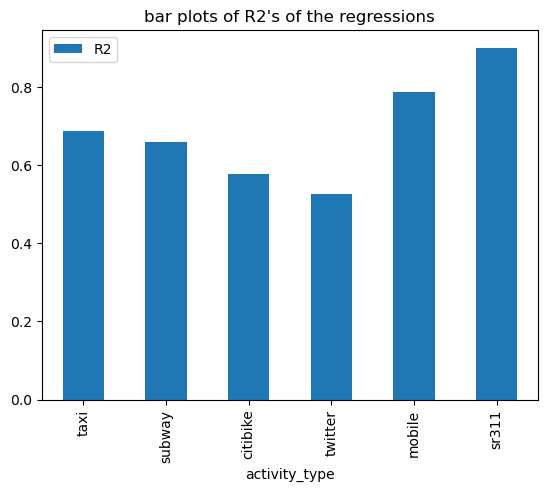

In [99]:
#plt.bar(x=table.index, height=table.R2, label="bar plots of R2's of the regressions")
#plt.bar(x=table.index,height=table.R2)
table.plot.bar(x='activity_type',y='R2',title="bar plots of R2's of the regressions")